## Import all the necessary Libraries

In [1]:

import os
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [2]:
## Import dataset
df = pd.read_csv("loan_approval_dataset.csv")

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
print(f" Number of rows: {df.shape[0]}")
print(f" Number of columns: {df.shape[1]}")

 Number of rows: 4269
 Number of columns: 13


In [5]:
df1 = df.copy()

In [6]:
## Display the column structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
# Generate descriptive statistics for numeric columns in the DataFrame

df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


<Axes: >

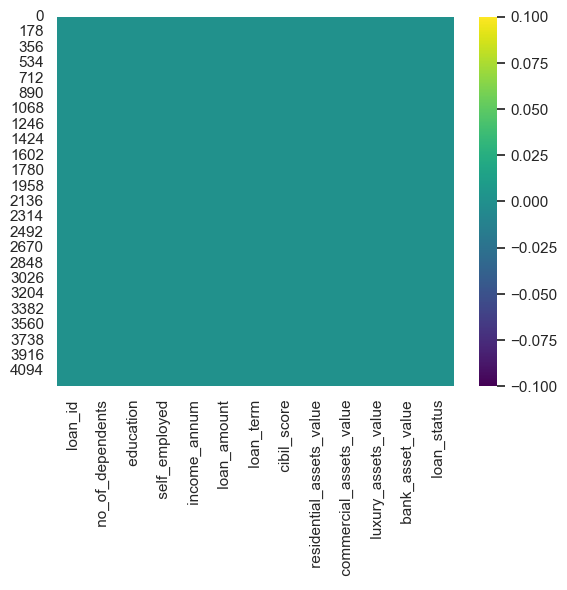

In [8]:
sns.heatmap(df.isna(),cmap='viridis')

In [9]:
## Verify the null values in the dataset

df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [10]:
## Verify the duplciate values in the dataset
df.duplicated().sum()

0

In [11]:
## Display the column names

df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [12]:
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [13]:
## If we closely observe the some of the column names have some space and we need to rectify this
df.columns = df.columns.str.replace(' ', '')

In [14]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [15]:
df.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [16]:
## Now we can drop the loan_id column as it indicates only the row index in the data set and does not contribute in data analysis

df = df.drop(columns=['loan_id'])

In [17]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [18]:
### Target variable distribution

print("Distribution of Loan status:")
print(df['loan_status'].value_counts())
print("Distribution of Loan status in percentage: \n")
print(df['loan_status'].value_counts(normalize=True))

Distribution of Loan status:
loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64
Distribution of Loan status in percentage: 

loan_status
 Approved    0.62216
 Rejected    0.37784
Name: proportion, dtype: float64


In [19]:
### Basic lambda function for binary classification:
    
# Convert 'Approved' to 1 and 'No' to 0
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == ' Approved' else 0)

In [20]:
print(df['loan_status'].value_counts())

loan_status
1    2656
0    1613
Name: count, dtype: int64


In [21]:
# Separate columns into categorical and numerical based on their data types

numerical_columns = df.select_dtypes(include=['int64','float64']).columns
print("Numerical columns:")
print(numerical_columns)

categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_columns)

Numerical columns:
Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

Categorical columns:
Index(['education', 'self_employed'], dtype='object')


In [22]:
## Find the unique values, no of unique and their distribution in the each Categorical/Object column in the dataframe

for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].unique()}")
    print(f"Unique Values: {df[col].nunique()}")
    print(f"Unique Values: {df[col].value_counts()}")
    print("-" * 60)

Column: education
Unique Values: [' Graduate' ' Not Graduate']
Unique Values: 2
Unique Values: education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64
------------------------------------------------------------
Column: self_employed
Unique Values: [' No' ' Yes']
Unique Values: 2
Unique Values: self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64
------------------------------------------------------------


## Exploratory Data Analysis (EDA) Visualizations¶

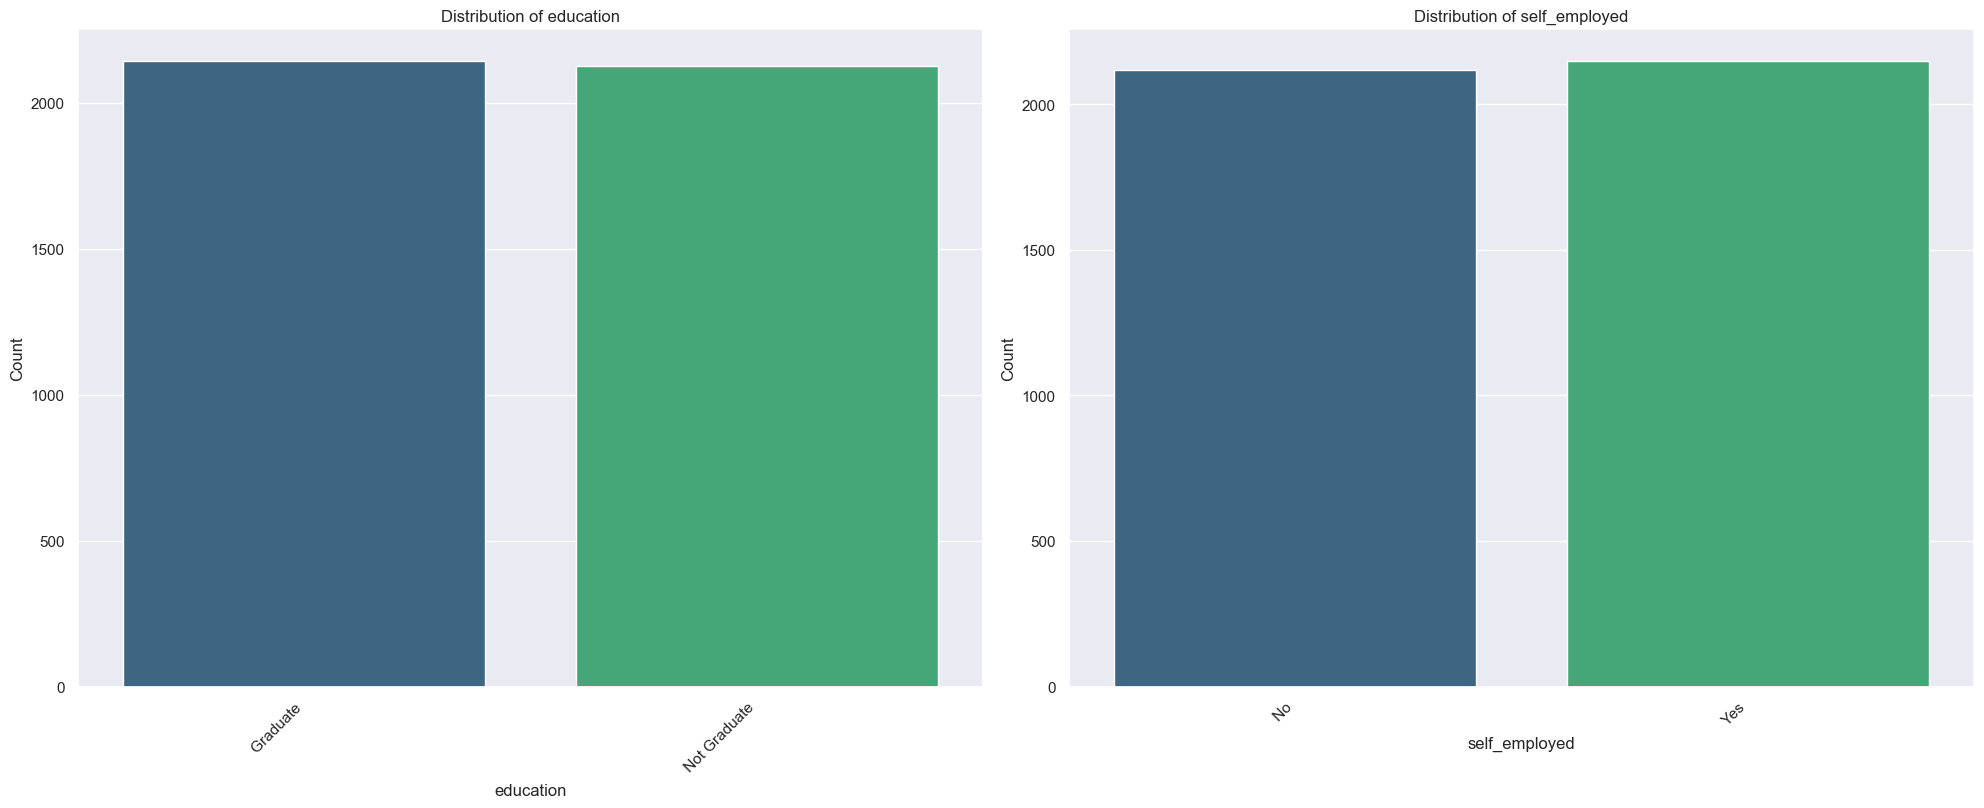

In [23]:
# Set the overall figure size for all the subplots (width=20, height=15)
plt.figure(figsize=(20, 15))

# Loop through each categorical column and plot its distribution
for i, col in enumerate(categorical_columns):
    # Create a subplot in a 4-row, 2-column grid and place the current plot at position (i + 1)
    plt.subplot(2, 2, i + 1)

    # Create a count plot (bar chart) for the current categorical column
    sns.countplot(data=df, x=col, palette='viridis')

    # Set the title for the current subplot
    plt.title(f'Distribution of {col}')

    # Label the x-axis with the column name
    plt.xlabel(col)

    # Label the y-axis as 'Count'
    plt.ylabel('Count')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

# Adjust subplot layout to prevent overlapping elements
plt.tight_layout()

# Display all the generated plots
plt.show()

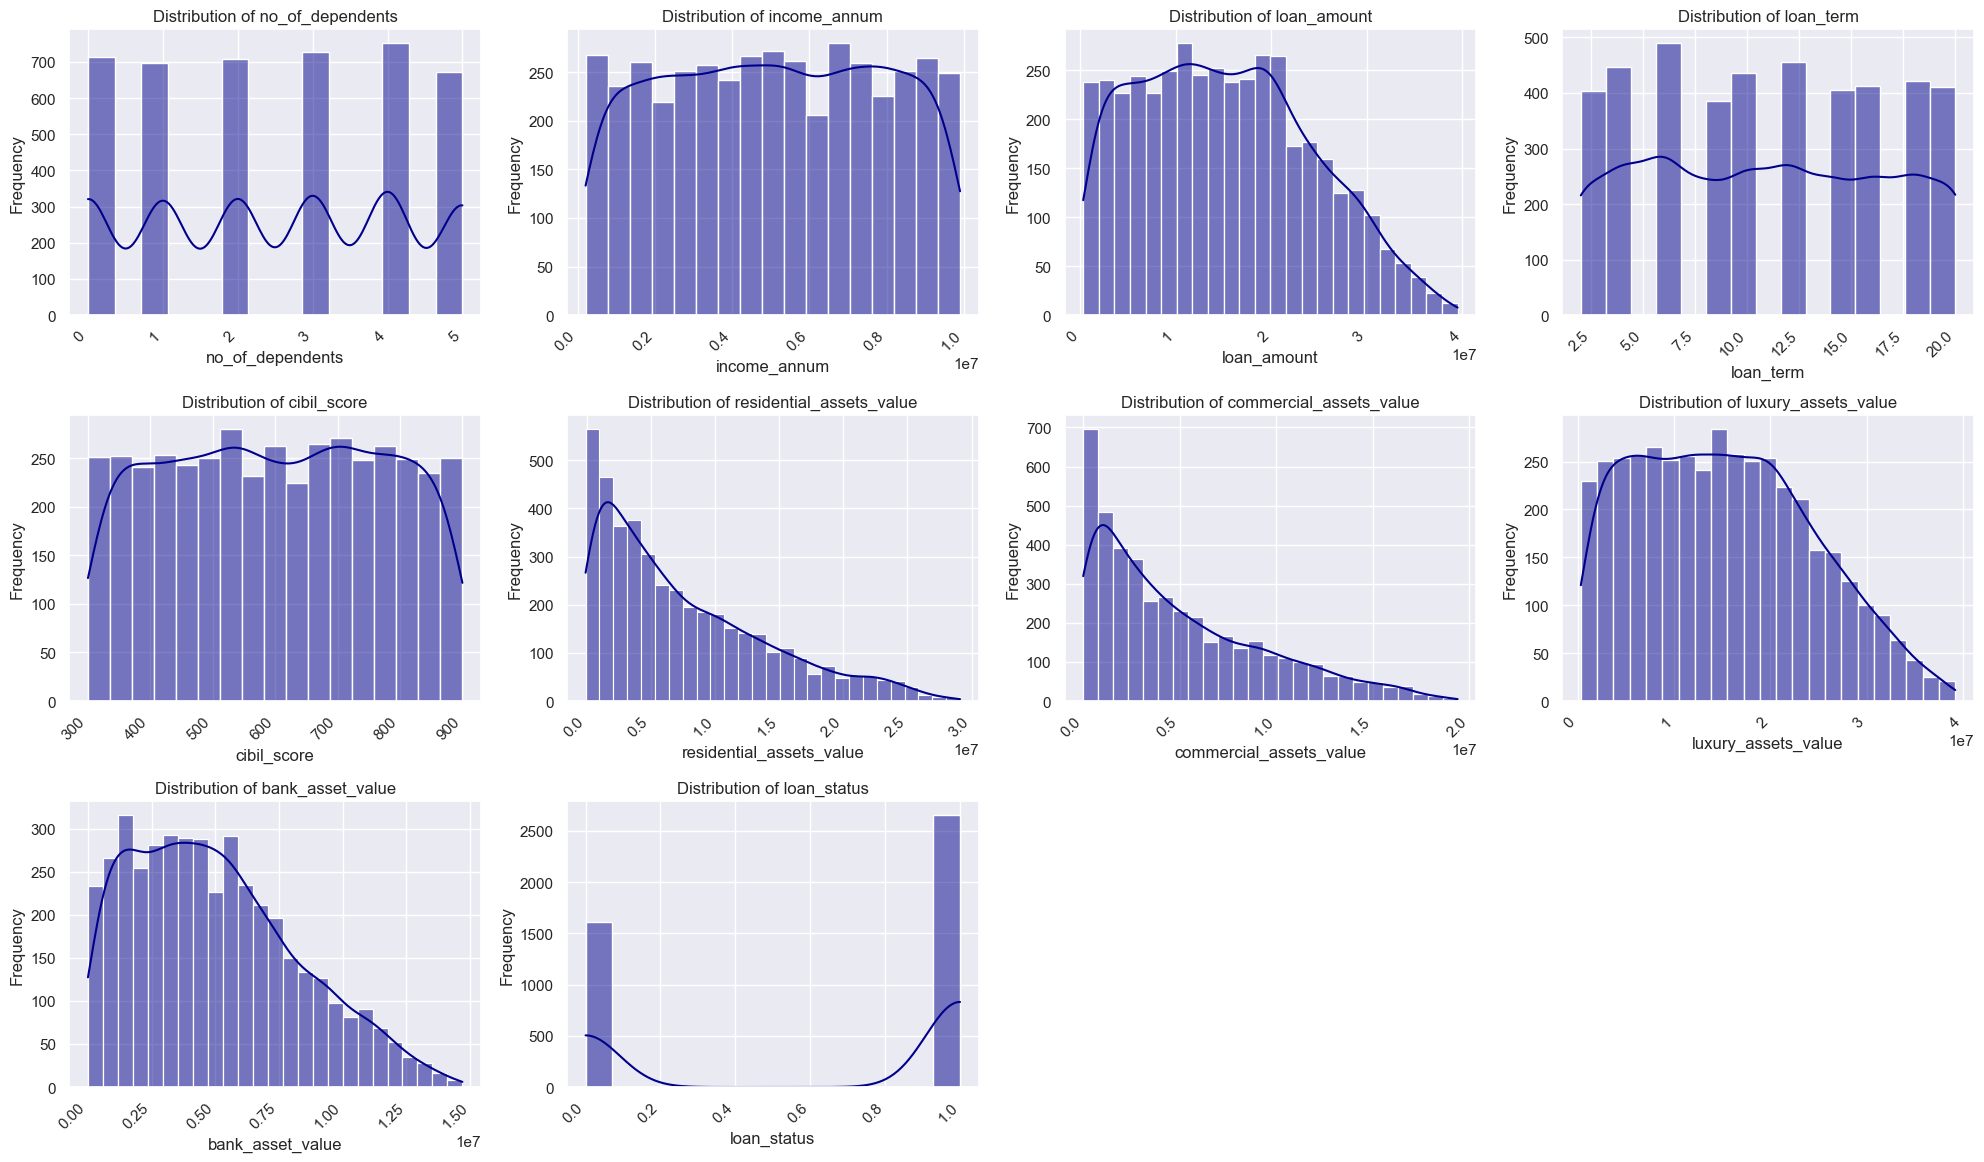

In [24]:
# Set the overall figure size for all numerical variable plots (width=20, height=15)
plt.figure(figsize=(20, 15))

# Loop through each numerical column and plot its distribution
for i, col in enumerate(numerical_columns):
    # Create a subplot in a 3-row, 3-column grid, and place the current plot at position (i + 1)
    plt.subplot(4, 4, i + 1)

    # Create a histogram with a KDE (Kernel Density Estimate) line to show distribution shape
    sns.histplot(data=df, x=col, kde=True, palette='viridis', color='darkblue')

    # Set the title for the current subplot
    plt.title(f'Distribution of {col}')

    # Label the x-axis with the column name
    plt.xlabel(col)

    # Label the y-axis as 'Frequency'
    plt.ylabel('Frequency')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlapping of plots and labels
plt.tight_layout()

# Display all the generated plots
plt.show()

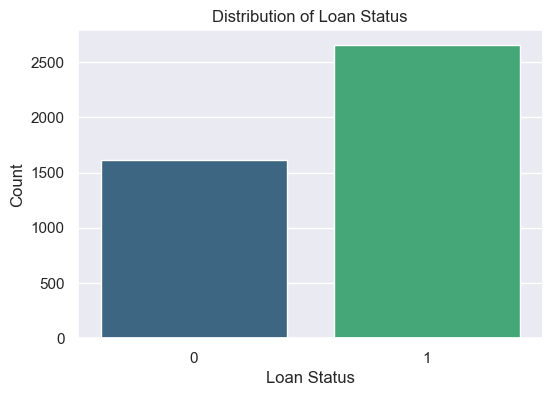

In [25]:
# Create a figure for the count plot with a specific size (width=6, height=4)
plt.figure(figsize=(6, 4))

# Create a count plot (bar chart) to show the frequency of each category in the 'loan_status' column
sns.countplot(data=df, x='loan_status', palette='viridis')

# Set the title of the plot
plt.title('Distribution of Loan Status')

# Label the x-axis
plt.xlabel('Loan Status')

# Label the y-axis
plt.ylabel('Count')

# Display the plot
plt.show()

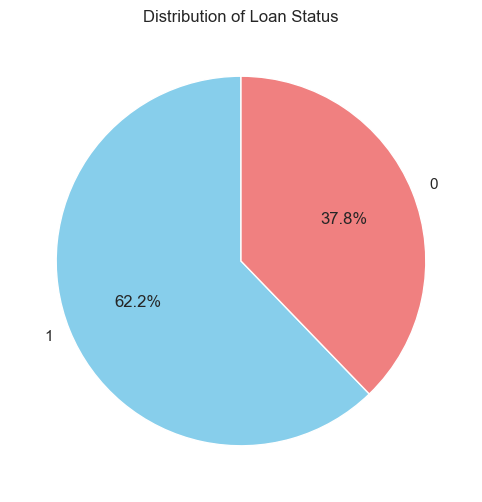

In [26]:
# Create a figure for the pie chart with a specified size (width=10, height=6)
plt.figure(figsize=(10, 6))

# Plot the distribution of the 'loan_status' column as a pie chart
# - value_counts() counts the number of occurrences of each category
# - kind='pie' specifies the chart type
# - autopct='%1.1f%%' displays percentages with 1 decimal place
# - startangle=90 rotates the chart for better orientation
# - colors assigns custom colors to the slices
df['loan_status'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral']
)

# Set the title of the pie chart
plt.title('Distribution of Loan Status')

# Remove the y-axis label for a cleaner look (not needed in pie charts)
plt.ylabel('')

# Display the chart
plt.show()

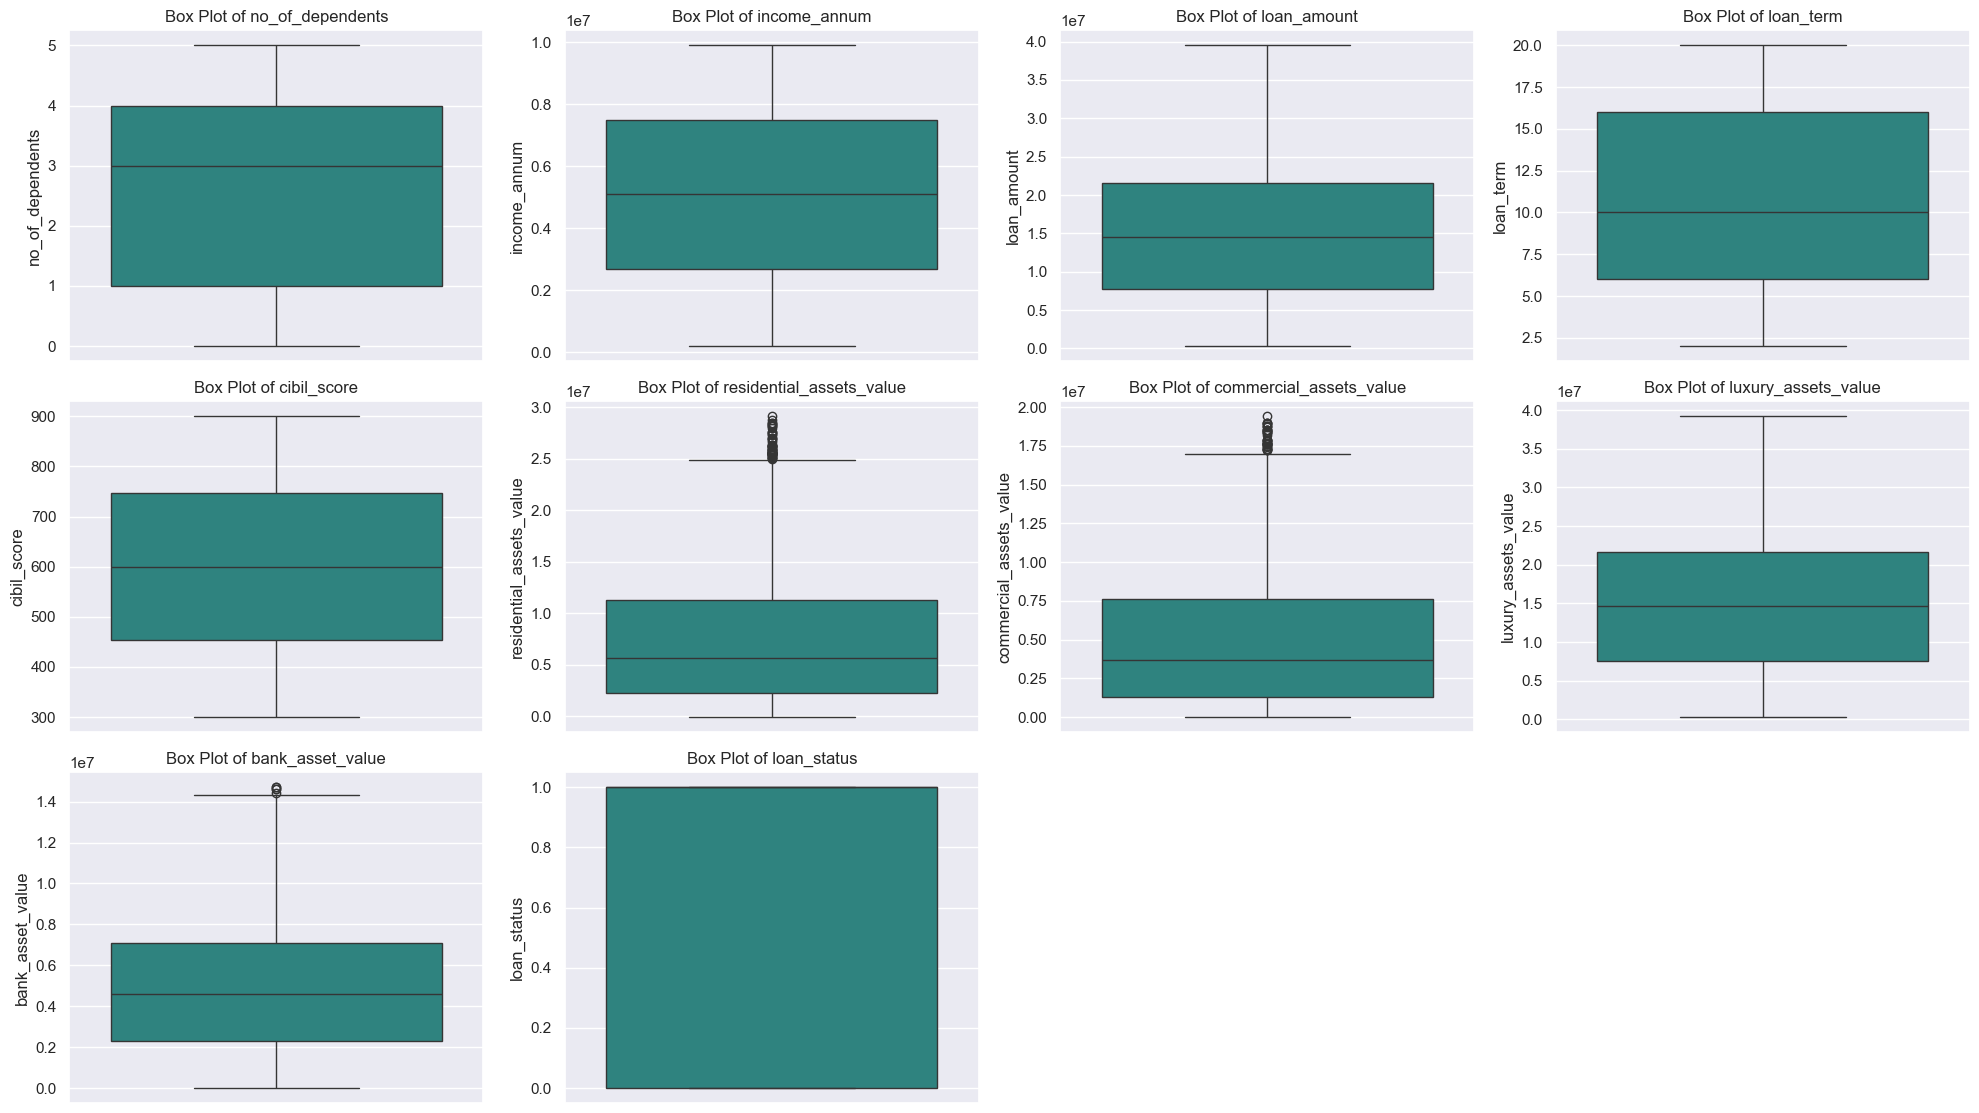

In [27]:
# Create a figure to hold all box plots, setting the overall size (width=20, height=15)
plt.figure(figsize=(20, 15))

# Loop through each numerical column to create individual box plots
for i, col in enumerate(numerical_columns):
    # Create a subplot in a 3-row, 3-column grid at position (i + 1)
    plt.subplot(4, 4, i + 1)

    # Create a box plot for the current numerical column
    sns.boxplot(data=df, y=col, palette='viridis')

    # Set the title for the current subplot
    plt.title(f'Box Plot of {col}')

    # Label the y-axis with the column name
    plt.ylabel(col)

# Adjust layout to prevent overlapping of plots and labels
plt.tight_layout()

# Display all the box plots
plt.show()

In [28]:
## From the above plot it is clearly evident that residential_assets_value, commercial_assets_value, bank_asset_value has outlier


In [29]:
categorical_columns

Index(['education', 'self_employed'], dtype='object')

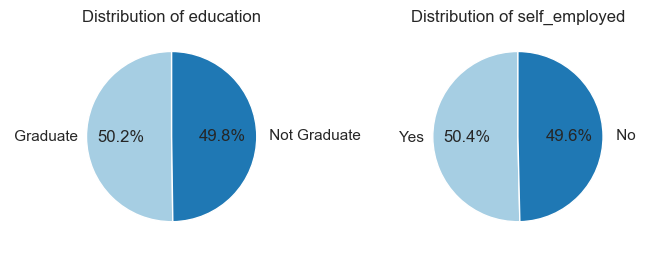

In [30]:
plt.figure(figsize=(7,5))

for i,x in enumerate(categorical_columns,1):
    plt.subplot(2,2,i)
    dfpie=df[x].value_counts()
    plt.pie(dfpie, labels=dfpie.index, autopct='%1.1f%%', startangle=90,
            colors=plt.cm.Paired.colors) 

    plt.title(f'Distribution of {x}')

plt.tight_layout()

In [31]:
numerical_columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

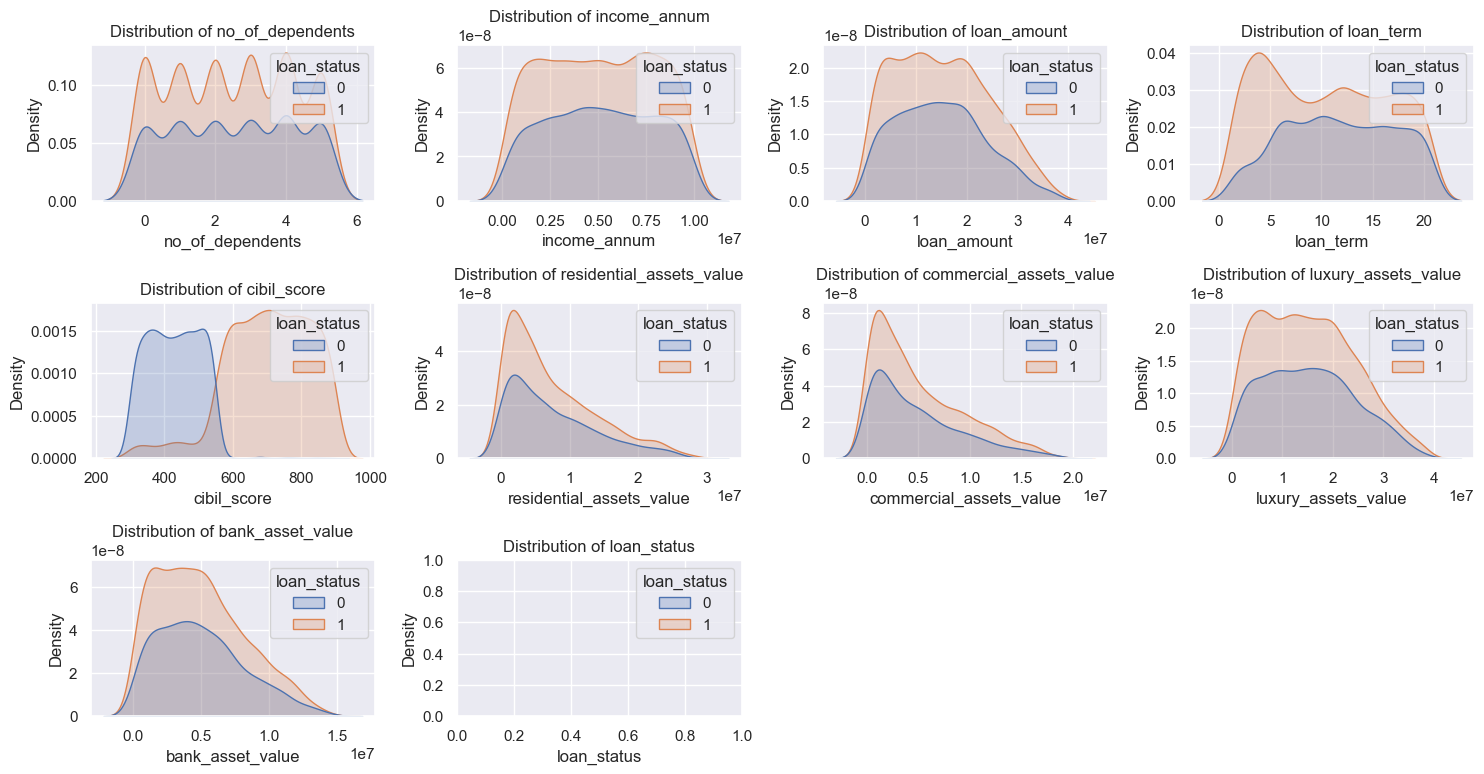

In [32]:
plt.figure(figsize=(15, 10))

for i, x in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.kdeplot(data=df, x=x, fill=True, hue='loan_status')
    plt.title(f'Distribution of {x}')
    plt.xlabel(x)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

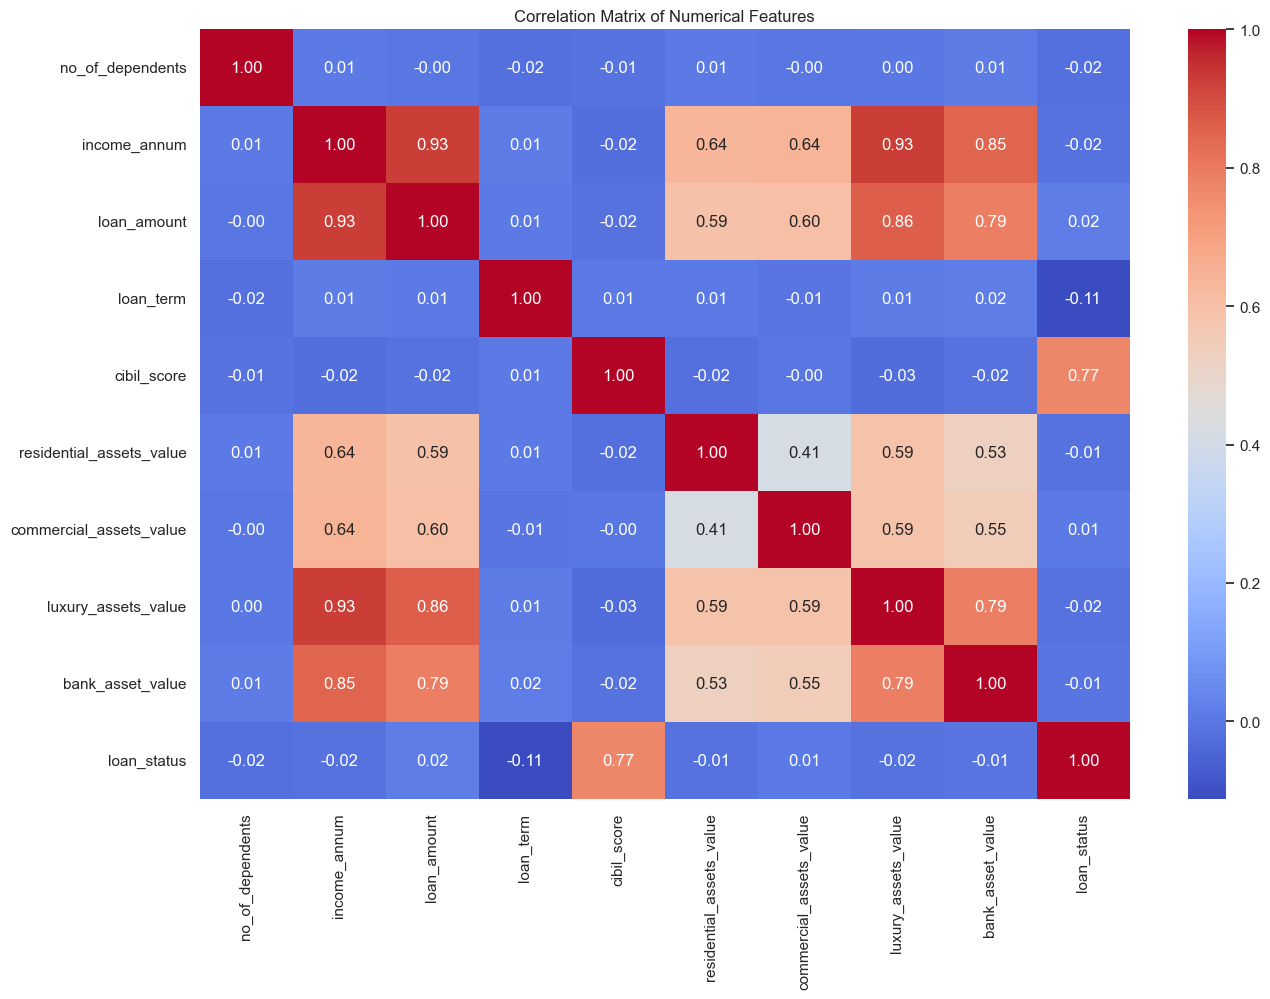

In [33]:
# Create a figure for the heatmap with a specified size (width=15, height=10)
plt.figure(figsize=(15, 10))

# Create a heatmap to visualize correlations between numerical features
# - data[numerical_columns].corr() computes the correlation matrix
# - annot=True displays the correlation values on the heatmap
# - cmap='coolwarm' sets the color scheme (blue to red)
# - fmt=".2f" formats the correlation numbers to 2 decimal places
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title('Correlation Matrix of Numerical Features')

# Display the heatmap
plt.show()

In [34]:
### Target variable distribution

print("Distribution of Loan status:")
print(df['loan_status'].value_counts())
print("Distribution of Loan status in percentage: \n")
print(df['loan_status'].value_counts(normalize=True))

Distribution of Loan status:
loan_status
1    2656
0    1613
Name: count, dtype: int64
Distribution of Loan status in percentage: 

loan_status
1    0.62216
0    0.37784
Name: proportion, dtype: float64


In [35]:
categorical_columns

Index(['education', 'self_employed'], dtype='object')

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])


In [38]:
categorical_columns

Index(['education', 'self_employed'], dtype='object')

In [39]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [40]:
df['loan_status'].value_counts()

loan_status
1    2656
0    1613
Name: count, dtype: int64

In [41]:
x = df.drop(columns = ['loan_status'])
y = df['loan_status']

In [42]:
x.shape

(4269, 11)

In [43]:
y.shape

(4269,)

## Data Scaling/Normalization

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2, stratify=y)

In [45]:
## We are going to use StandardScaler to normalize our test data

In [46]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [47]:
x_train_scaled

array([[ 0.89071783, -0.99853694, -1.00852831, ..., -1.13730558,
        -0.44443983, -0.73682658],
       [ 0.30110717, -0.99853694,  0.99154381, ...,  0.78599456,
        -0.04838711, -0.39679525],
       [-0.28850349, -0.99853694,  0.99154381, ...,  1.74764462,
         1.30479299,  0.71603457],
       ...,
       [ 0.30110717, -0.99853694,  0.99154381, ...,  0.32806595,
        -0.3894325 , -0.42770719],
       [-1.46772481, -0.99853694, -1.00852831, ..., -0.83965199,
        -0.6974735 ,  0.37600323],
       [ 0.30110717, -0.99853694, -1.00852831, ...,  1.47288746,
         1.43681056,  2.10707184]])

In [48]:
x_test_scaled

array([[ 0.2737474 ,  1.01653005,  0.99766082, ..., -0.75976729,
         0.23243344,  0.34793817],
       [ 0.86410164,  1.01653005,  0.99766082, ..., -0.26772952,
        -0.46669606, -0.55889559],
       [-0.90696108, -0.98373875, -1.00234467, ..., -0.78213264,
         0.76770446,  0.31771038],
       ...,
       [ 0.86410164, -0.98373875,  0.99766082, ..., -1.09524758,
        -0.59778284,  0.58976051],
       [ 1.45445587, -0.98373875, -1.00234467, ..., -1.00578617,
        -1.57000979, -1.37504598],
       [ 0.2737474 , -0.98373875,  0.99766082, ...,  0.11248149,
         1.65254022,  0.58976051]])

### Decision Tree

In [49]:
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

<Axes: xlabel='Importance', ylabel='Feature'>

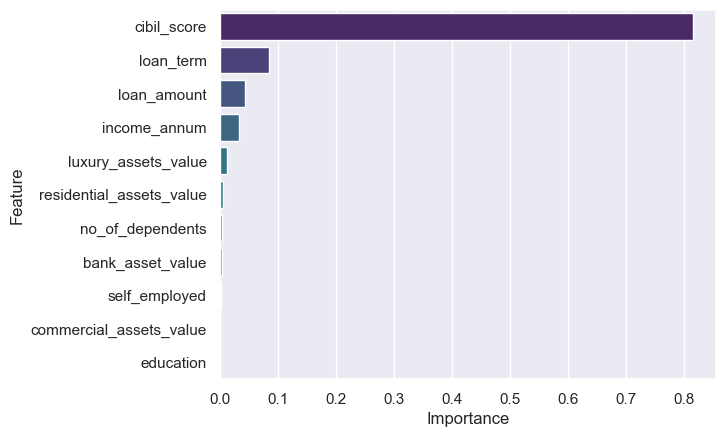

In [50]:
importance=dt.feature_importances_
feature_names = x_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
sns.barplot(data=feature_importance_df,x='Importance',y='Feature',orient = 'h', palette='viridis')

In [51]:
feature_importance_df

,Feature,Importance
6,cibil_score,0.813971
5,loan_term,0.084699
4,loan_amount,0.043689
3,income_annum,0.032070
9,luxury_assets_value,0.012525
7,residential_assets_value,0.005164
0,no_of_dependents,0.004005
10,bank_asset_value,0.002793
2,self_employed,0.000831
8,commercial_assets_value,0.000253


In [52]:
y_pred_dt = dt.predict(x_test_scaled)

In [77]:
def evaluate_model(model,pred):
    print(f'Accuracy Train Score : {model.score(x_train_scaled,y_train)}\n')
    print(f'Accuracy Test Score : {model.score(x_test_scaled,y_test)}\n')
    print(f'Recall Test Score : {recall_score(x_test_scaled,y_test)}\n')
    print(f'Recall Test Score : {precision_score(x_test_scaled,y_test)}\n')


    print(f'classification report:\n {classification_report(y_test,pred)}')
    print('\nConfusion Matrix')
    cm=confusion_matrix(pred,y_test)
    sns.heatmap(cm,annot=True,fmt='d')
    plt.xlabel('Predicted')  # X-axis: model predictions
    plt.ylabel('Actual')  # Y-axis: 
    plt.show()
    accuracy_test = accuracy_score(y_test, pred)
    return accuracy_test

Accuracy Train Score : 1.0

Accuracy Test Score : 0.9800936768149883

classification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       323
           1       0.99      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854


Confusion Matrix


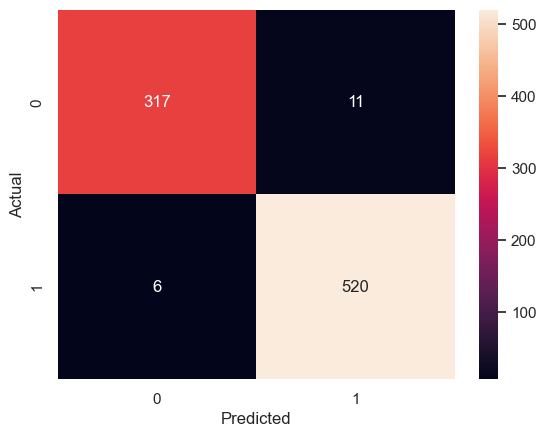

In [78]:
dt_score = evaluate_model(dt,y_pred_dt)

## Random Forest

In [55]:
rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [56]:
### Visualizing feature importances from a Random Forest model using Seaborn

<Axes: xlabel='Importance', ylabel='Feature'>

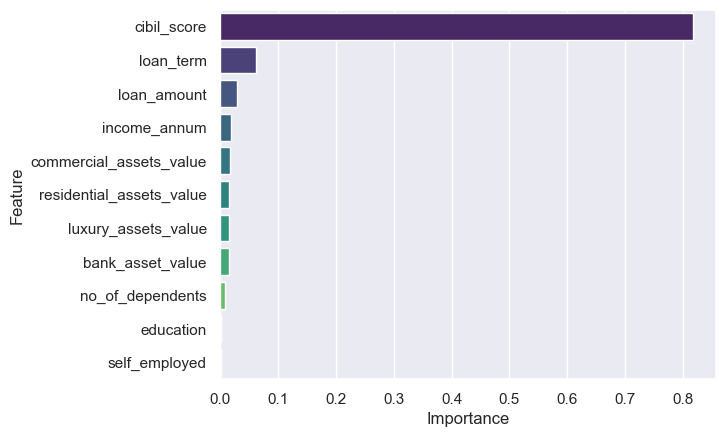

In [57]:
importance=rf.feature_importances_
feature_names = x_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
sns.barplot(data=feature_importance_df,x='Importance',y='Feature',orient = 'h', palette='viridis')

In [58]:
feature_importance_df

,Feature,Importance
6,cibil_score,0.816391
5,loan_term,0.062188
4,loan_amount,0.029289
3,income_annum,0.018223
8,commercial_assets_value,0.016245
7,residential_assets_value,0.015655
9,luxury_assets_value,0.015505
10,bank_asset_value,0.014538
0,no_of_dependents,0.007632
1,education,0.002214


In [59]:
y_pred_rf = rf.predict(x_test_scaled)

Accuracy Train Score : 1.0

Accuracy Test Score : 0.9789227166276346

classification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       323
           1       0.98      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854


Confusion Matrix


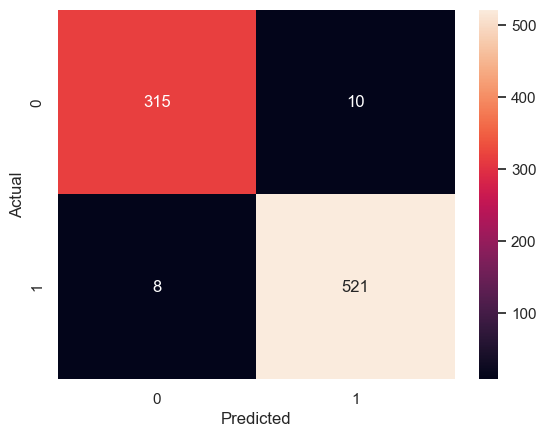

In [79]:
rf_score = evaluate_model(rf,y_pred_rf)

In [61]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy socre: {accuracy}")

Accuracy socre: 0.9789227166276346


In [62]:
# Initialize XGBoost model for binary classification with 120 trees
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss', n_estimators=120, random_state=42)

# Train the model on the balanced training data
xgb.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=120,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [63]:
y_pred_xgb = xgb.predict(x_test_scaled)

Accuracy Train Score : 1.0

Accuracy Test Score : 0.9449648711943794

classification report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       323
           1       0.94      0.98      0.96       531

    accuracy                           0.94       854
   macro avg       0.95      0.93      0.94       854
weighted avg       0.95      0.94      0.94       854


Confusion Matrix


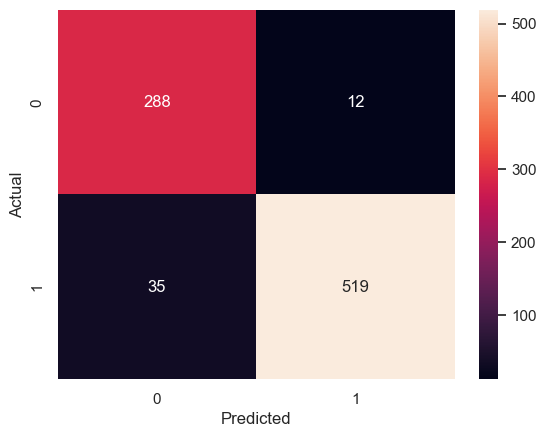

In [80]:
xgb_score = evaluate_model(xgb,y_pred_xgb)

### Save the Model

In [65]:
# For saving and loading models
import joblib

In [66]:
# Save the trained model to a .pkl file using joblib
# The filename includes the model type and its accuracy for reference
joblib.dump(rf, f"random_forest_model_{accuracy * 100:.2f}%.pkl")

['random_forest_model_97.89%.pkl']

## Artificial Neural Network

In [67]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers

In [68]:
mscaler=MinMaxScaler()

In [69]:
df1

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [70]:

# Build model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


# Train
model.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=20, batch_size=32)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,017 (54.75 KB)

 Trainable params: 14,017 (54.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8147 - loss: 0.4373 - val_accuracy: 0.9274 - val_loss: 0.1837
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.9311 - loss: 0.1814 - val_accuracy: 0.9426 - val_loss: 0.1467
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.9407 - loss: 0.1426 - val_accuracy: 0.9520 - val_loss: 0.1286
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.9452 - loss: 0.1570 - val_accuracy: 0.9379 - val_loss: 0.1376
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.9458 - loss: 0.1409 - val_accuracy: 0.9614 - val_loss: 0.1037
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.9629 - loss: 0.1043 - val_accuracy: 0.9567 - val_loss: 0.1027
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.9609 - loss: 0.1026 - val_accuracy: 0.9625 - val_loss: 0.0962
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9674 - loss: 0.0854 - va

In [81]:
## Evaludate the model with accuracy
loss, nn_accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Test Accuracy: {nn_accuracy:.2f}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.9712 - loss: 0.1089
Test Accuracy: 0.97


In [82]:
score=pd.DataFrame({'Models':['DecisionTreeClassifier','RandomForestClassifier','XGB','Neural network'],
"Accuracy":[dt_score,rf_score,xgb_score,nn_accuracy]
})
score

,Models,Accuracy
0,DecisionTreeClassifier,0.980094
1,RandomForestClassifier,0.978923
2,XGB,0.944965
3,Neural network,0.970726
